This tutorial will demonstrate how to obtain difference images for a planet candidate in TESS data.

In [1]:
import matplotlib.pyplot as plt
import sys
import pickle


Provide some basic information on the star and its planet. In this example, we'll look at TIC-25375553, the host star of confirmed planet TOI-143.01 (WASP-111b). There's only one planet in this example, but for multi-planet systems you should list all planets in the same format.

In [2]:
star = {}
star['id'] = 25375553
star['raDegrees'] = 328.76768
star['decDegrees'] = -22.61258

planet0 = {}
planet0['planetID'] = "TOI_" + str(143.01)
planet0['period'] = 2.31097
planet0['epoch'] = 1325.58249
planet0['durationHours'] = 3.129

Since TESS works in distinct "sectors" of data (~27 days), decide which sector you would like to use for difference images. TIC-25375553 was observed in both Sectors 1 and 28, but if you aren't sure, you can check with tess-point. For example:

In [3]:
from tess_stars2px import tess_stars2px_function_entry

outID, outEclipLong, outEclipLat, outSec, outCam, outCcd,\
    outColPix, outRowPix, scinfo = tess_stars2px_function_entry(star['id'], star['raDegrees'], star['decDegrees'])

print(outSec, outCam)

[ 1 28 68] [1 1 1]


Let's pick the most recently observed sector, Sector 28. This will take about a minute to run, as it downloads the FFI cutout using TESScut, identifies the in-transit datapoints, and calculates the difference image. 

In [4]:
from transitDiffImage import tessDiffImage

star['sector'] = 1
star['cam'] = 1
star['planetData'] = [planet0]
# If you have quality flags for each cadence in the sector in a file, name the file here; otherwise None
star['qualityFiles'] = None
# If you have quality flags for each cadence in the sector in an array, put the array here; otherwise None
star['qualityFlags'] = None

tdi = tessDiffImage.tessDiffImage(star)

tdi.make_ffi_difference_image(thisPlanet=0)

curl -JL "https://mast.stsci.edu/tesscut/api/v0.1/astrocut?ra=328.76768&dec=-22.61258&y=21&x=21&sector=1" --output ./tic25375553_s1.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100 10.9M  100 10.9M    0     0   835k      0  0:00:13  0:00:13 --:--:-- 1772k


Archive:  ./tic25375553_s1.zip
 extracting: ./tic25375553/tess-s0001-1-3_328.767680_-22.612580_21x21_astrocut.fits  
['./tic25375553/tess-s0001-1-3_328.767680_-22.612580_21x21_astrocut.fits']
./tic25375553/tess-s0001-1-3_328.767680_-22.612580_21x21_astrocut.fits
making difference image for sector 1


/Users/steve/opt/anaconda3/lib/python3.9/site-packages/erfa/core.py:4613: RuntimeWarning: invalid value encountered in ld
  p1 = ufunc.ld(bm, p, q, e, em, dlim)
/Users/steve/opt/anaconda3/lib/python3.9/site-packages/erfa/core.py:19005: RuntimeWarning: invalid value encountered in anp
  c_retval = ufunc.anp(a)
/Users/steve/opt/anaconda3/lib/python3.9/site-packages/transitDiffImage/tessDiffImage.py:456: RuntimeWarning: Mean of empty slice
  meanInTransit = np.nanmean(pixelData["flux"][inTransitIndices,::-1,:], axis=0)
/Users/steve/opt/anaconda3/lib/python3.9/site-packages/transitDiffImage/tessDiffImage.py:457: RuntimeWarning: invalid value encountered in true_divide
  meanInTransitSigma = np.sqrt(np.sum(pixelData["fluxErr"][inTransitIndices,::-1,:]**2, axis=0)/len(inTransitIndices))
/Users/steve/opt/anaconda3/lib/python3.9/site-packages/transitDiffImage/tessDiffImage.py:458: RuntimeWarning: Mean of empty slice
  meanOutTransit = np.nanmean(pixelData["flux"][outTransitIndices,::-1,:], axi

In [5]:
star

{'id': 25375553,
 'raDegrees': 328.76768,
 'decDegrees': -22.61258,
 'sector': 1,
 'cam': 1,
 'planetData': [{'planetID': 'TOI_143.01',
   'period': 2.31097,
   'epoch': 1325.58249,
   'durationHours': 3.129,
   'planetIndex': 0,
   'badCadenceAlert': False}],
 'qualityFiles': None,
 'qualityFlags': None}

The image data was saved in the newly created tic25375553 folder. You'll also find difference image plots saved as pdfs using default the default plotting, and a list of all nearby TICs. You can always load the data back in if you want to manipulate the data on your own:

For various reasons not all sectors will get difference images, so see what sectors actually have difference images.

In [6]:
tdi.sectorList

[1]

In [7]:
if star['sector'] is not None:
    sector = star['sector']
else: # have to set desired sector by hand
    sector = 1
sectorIndex = tdi.sectorList.index(sector) # make sure outSec[sectorIndex] is in tdi.sectorList

fname = 'tic25375553/imageData_TOI_143.01_sector' + str(sector) + '.pickle'
with open(fname, 'rb') as f:
    imageData = pickle.load(f)

Text(0.5, 1.0, 'Direct Image (Close-up)')

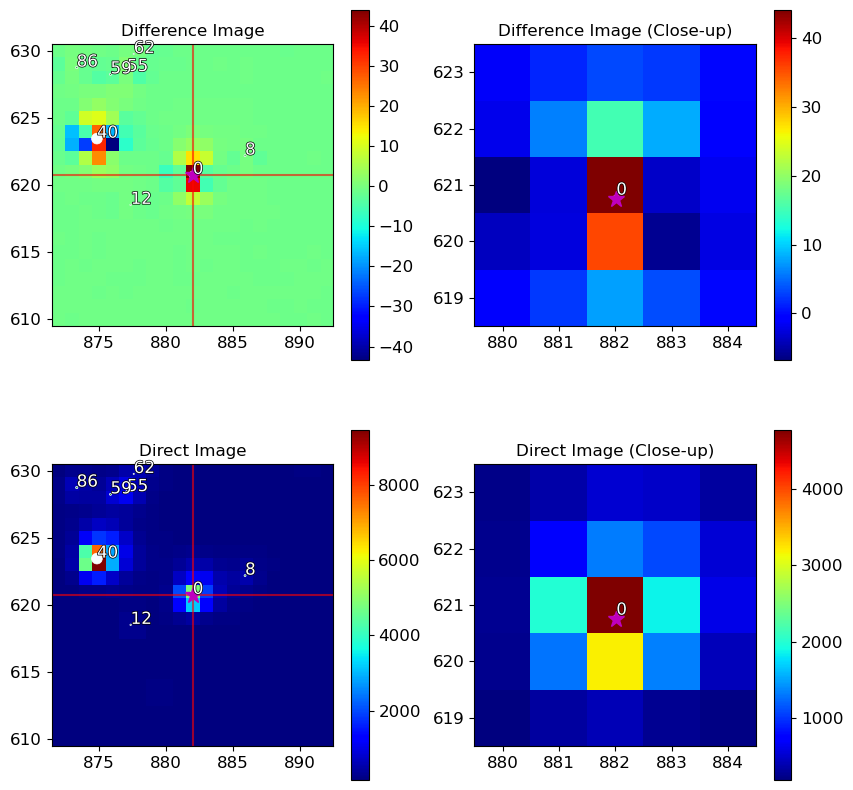

In [8]:
diffImageData = imageData[0]
catalogData = imageData[1]

fig, ax = plt.subplots(2,2,figsize=(10,10))
tdi.draw_pix_catalog(diffImageData['diffImage'], catalogData, catalogData["extent"], ax=ax[0,0], fs=14, ss=60, filterStars=True, dMagThreshold=4, annotate=True)
tdi.draw_pix_catalog(diffImageData['diffImage'], catalogData, catalogData["extentClose"], ax=ax[0,1], fs=14, ss=60, filterStars=True, dMagThreshold=4, annotate=True, close=True)
tdi.draw_pix_catalog(diffImageData['meanOutTransit'], catalogData, catalogData["extent"], ax=ax[1,0], fs=14, ss=60, filterStars=True, dMagThreshold=4, annotate=True)
tdi.draw_pix_catalog(diffImageData['meanOutTransit'], catalogData, catalogData["extentClose"], ax=ax[1,1], fs=14, ss=60, filterStars=True, dMagThreshold=4, annotate=True, close=True)
ax[0,0].set_title('Difference Image')
ax[0,1].set_title('Difference Image (Close-up)')
ax[1,0].set_title('Direct Image')
ax[1,1].set_title('Direct Image (Close-up)')